<a href="https://colab.research.google.com/github/Nannanpeng/Econ_Dynamic_Programming/blob/master/inventory_dynamics_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numba import njit, jitclass, float64, prange

firm_data = [
   ('s', float64),          # restock trigger level
   ('S', float64),          # capacity
   ('mu', float64),         # shock location parameter
   ('sigma', float64)       # shock scale parameter
]

@jitclass(firm_data)
class Firm:

    def __init__(self, s=10, S=100, mu=1.0, sigma=0.5):
        self.s, self.S, self.mu, self.sigma = s, S, mu, sigma

    def update(self, x):
        "Update the state from t to t+1 given current state x."
        Z = np.random.randn()
        D = np.exp(self.mu + self.sigma * Z)
        if x <= self.s:
            return max(self.S - D, 0)
        else:
            return max(x - D, 0)

    def sim_inventory_path(self, x_init, sim_length):
        X = np.empty(sim_length)
        X[0] = x_init

        for t in range(sim_length-1):
            X[t+1] = self.update(X[t])
        return X

In [3]:
T = [10, 50, 250, 500, 750]
n = 50000
init_stock = 50

firm = Firm()
stock_path = []
for _ in range(n):
  path = firm.sim_inventory_path(init_stock, T[-1]+1)
  stock_path.append(path)

In [4]:
T_stock_path = np.array(stock_path)[:, T]

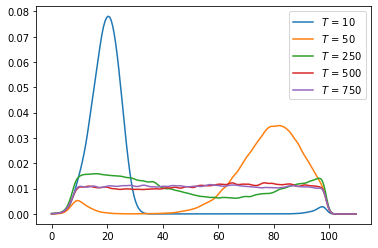

In [5]:
from sklearn.neighbors import KernelDensity

xmin, xmax = 0.9 * T_stock_path.min(), 1.1 * T_stock_path.max()
xgrid = np.linspace(xmin, xmax, 200)
for sample, t in zip(T_stock_path.T, T):
  kde = KernelDensity(kernel='gaussian').fit(sample.reshape(-1, 1))
  log_dens = kde.score_samples(xgrid.reshape(-1, 1))
  plt.plot(xgrid, np.exp(log_dens), label=f'$T$ = {t}')
plt.legend();

## Exercise 2

In [6]:
%%time

init_stock = 70
t = 50
n = 1000000
stock_path = []
for _ in range(n):
  path = firm.sim_inventory_path(init_stock, t)
  stock_path.append(path)

CPU times: user 8.86 s, sys: 131 ms, total: 8.99 s
Wall time: 8.99 s


In [7]:
stock_path = np.array(stock_path)

total_restock = (stock_path <= firm.s).sum(axis=1)

prob_twice_restock = (total_restock == 2).sum()/n

In [8]:
prob_twice_restock

0.44731